# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [4]:

import plotly.express as px
from plotly import graph_objects
import yfinance as yf


import datetime as dt
import pandas as pd
import numpy as np

import plotly.io as pio

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [19]:
ativos = ['WEGE3.SA', 'ITSA4.SA', 'HGRE11.SA']
dt_ini, dt_fim = '2021-01-01', '2023-07-01'


# Baixar os dados com yfinance
dados = yf.download(ativos, start=dt_ini, end=dt_fim)

[*********************100%***********************]  3 of 3 completed


In [20]:
print(dados)

Price            Close                             High                       \
Ticker       HGRE11.SA  ITSA4.SA   WEGE3.SA   HGRE11.SA  ITSA4.SA   WEGE3.SA   
Date                                                                           
2021-01-04  117.847694  8.102570  34.756062  120.933249  8.306011  35.580480   
2021-01-05  117.235275  8.039433  36.889297  118.227611  8.067495  36.889297   
2021-01-06  116.514236  8.200784  37.867443  117.739153  8.306012  38.878172   
2021-01-07  116.537498  8.530499  39.432426  116.793325  8.572590  39.595447   
2021-01-08  116.405678  8.509454  41.817196  116.979376  8.663789  41.915008   
...                ...       ...        ...         ...       ...        ...   
2023-06-26  114.382446  8.108636  35.213219  115.677590  8.159000  35.474412   
2023-06-27  115.873566  8.024694  35.309956  115.873566  8.150604  35.455066   
2023-06-28  116.521126  7.940754  35.387348  117.160181  8.033089  35.580824   
2023-06-29  118.591667  8.058270  35.638

In [21]:
dados.to_csv('dadosLimpos.csv', sep=',')

In [22]:
dados.shape

(621, 15)

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [23]:
amplitudade = dados['High'] - dados['Low']
amplitudade

Ticker,HGRE11.SA,ITSA4.SA,WEGE3.SA
Date,,,
2021-01-04,3.093303,0.287623,0.880313
2021-01-05,1.550526,0.168365,2.422023
2021-01-06,1.480743,0.301654,2.487236
2021-01-07,0.891547,0.413898,1.476506
2021-01-08,1.457498,0.231502,2.394078
...,...,...,...
2023-06-26,2.411372,0.125911,0.822285
2023-06-27,2.530661,0.167879,0.657830
2023-06-28,2.709589,0.100728,0.483698


In [24]:
print(dados.head)

<bound method NDFrame.head of Price            Close                             High                       \
Ticker       HGRE11.SA  ITSA4.SA   WEGE3.SA   HGRE11.SA  ITSA4.SA   WEGE3.SA   
Date                                                                           
2021-01-04  117.847694  8.102570  34.756062  120.933249  8.306011  35.580480   
2021-01-05  117.235275  8.039433  36.889297  118.227611  8.067495  36.889297   
2021-01-06  116.514236  8.200784  37.867443  117.739153  8.306012  38.878172   
2021-01-07  116.537498  8.530499  39.432426  116.793325  8.572590  39.595447   
2021-01-08  116.405678  8.509454  41.817196  116.979376  8.663789  41.915008   
...                ...       ...        ...         ...       ...        ...   
2023-06-26  114.382446  8.108636  35.213219  115.677590  8.159000  35.474412   
2023-06-27  115.873566  8.024694  35.309956  115.873566  8.150604  35.455066   
2023-06-28  116.521126  7.940754  35.387348  117.160181  8.033089  35.580824   
2023-06-29

In [25]:
print(amplitudade)
print(type(amplitudade))

Ticker      HGRE11.SA  ITSA4.SA  WEGE3.SA
Date                                     
2021-01-04   3.093303  0.287623  0.880313
2021-01-05   1.550526  0.168365  2.422023
2021-01-06   1.480743  0.301654  2.487236
2021-01-07   0.891547  0.413898  1.476506
2021-01-08   1.457498  0.231502  2.394078
...               ...       ...       ...
2023-06-26   2.411372  0.125911  0.822285
2023-06-27   2.530661  0.167879  0.657830
2023-06-28   2.709589  0.100728  0.483698
2023-06-29   3.280490  0.151093  0.551415
2023-06-30   2.632919  0.117516  1.238269

[621 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


In [26]:
amplitudade_vertical = amplitudade.stack().reset_index()
amplitudade_vertical.columns = ['data', 'ativo', 'valor']

amplitudade_vertical.head()

,data,ativo,valor
0,2021-01-04,HGRE11.SA,3.093303
1,2021-01-04,ITSA4.SA,0.287623
2,2021-01-04,WEGE3.SA,0.880313
3,2021-01-05,HGRE11.SA,1.550526
4,2021-01-05,ITSA4.SA,0.168365


In [27]:
fig = px.line(amplitudade_vertical, x='data', y='valor', color='ativo', template='plotly_dark')
fig.show()

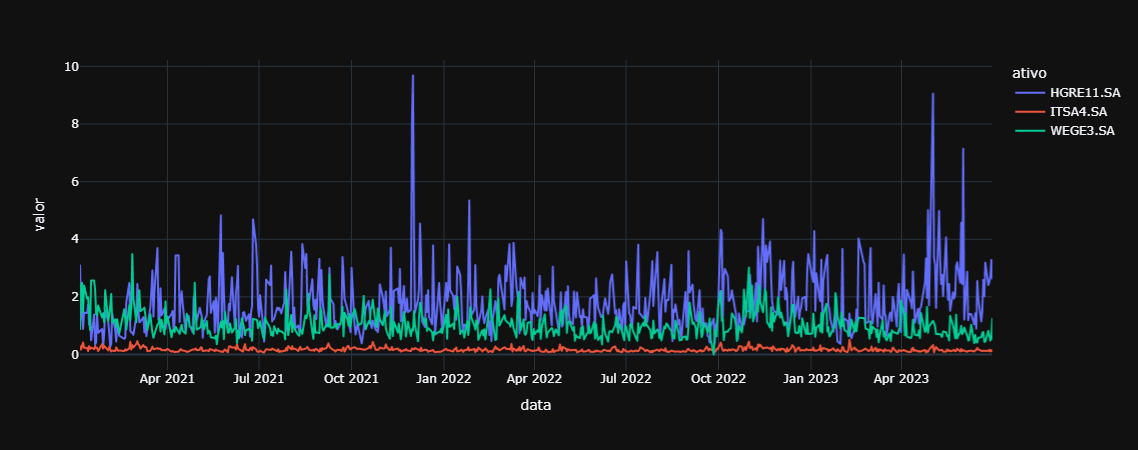

In [28]:
fig = px.line(amplitudade_vertical, x='data', y='valor', color='ativo', template='plotly_white')
fig.show()

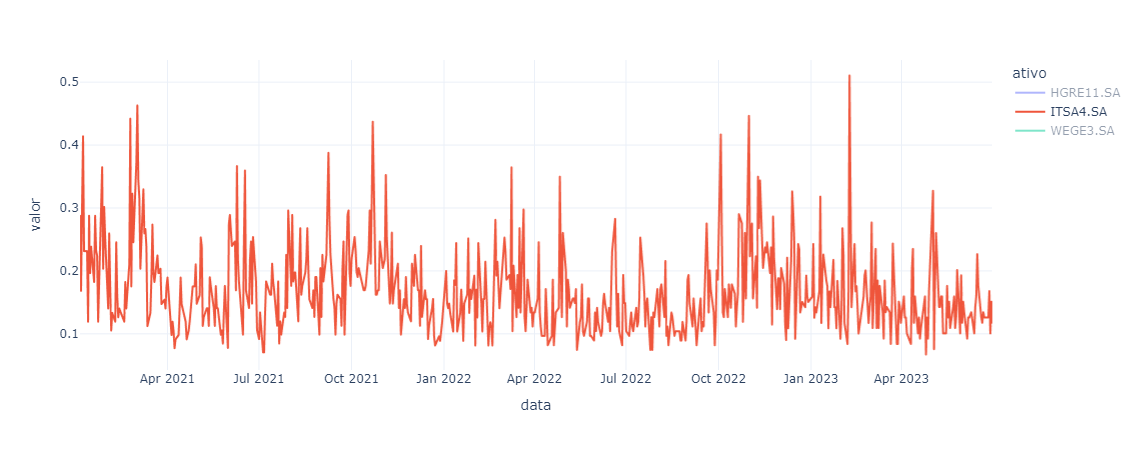

Quando analisamos os três ativos podemos notar que o HGRE foi o que apresentou maior volatilidade, porém quando analisamos um ativo único o ITSA4 é o que apresenta linhas mais acentuadas durante o período apresentado.